In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','species']
iris = pd.read_csv(url, names = col_name)

In [3]:
iris.head()


,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.shape


(150, 5)

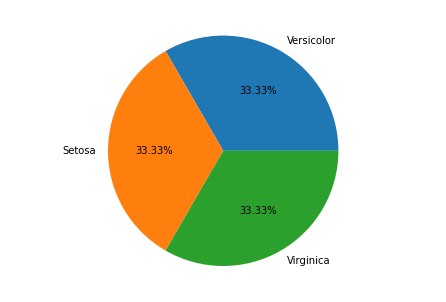

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

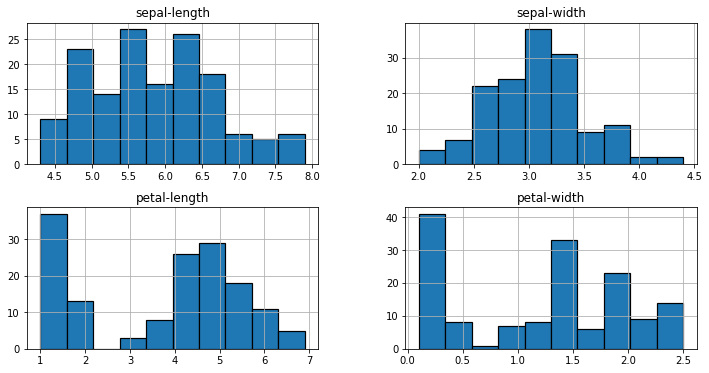

In [7]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

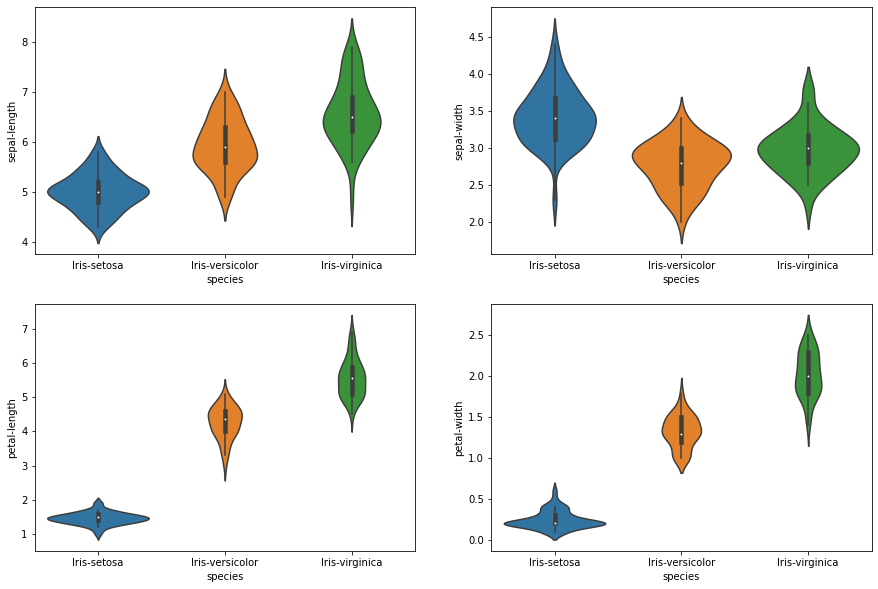

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal-length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal-width', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal-length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal-width', data=iris)

In [1]:
plt.rcParams['figure.figsize'] = [20,20]
sns.pairplot(iris,hue='species');

NameError: ignored

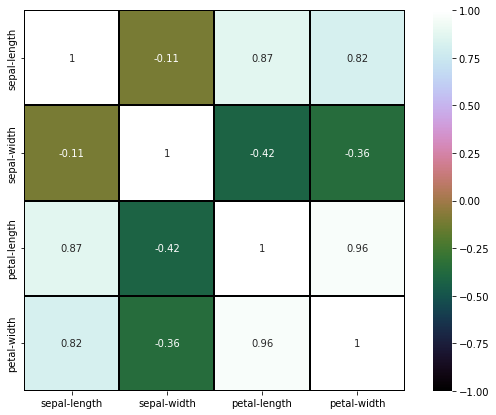

In [10]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [28]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
train_X = train.iloc[:,:-1]
train_y = train.species
test_X = test.iloc[:,:-1]
test_y = test.species 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [29]:
print(train_X)

     sepal-length  sepal-width  petal-length  petal-width
88            5.6          3.0           4.1          1.3
3             4.6          3.1           1.5          0.2
65            6.7          3.1           4.4          1.4
31            5.4          3.4           1.5          0.4
83            6.0          2.7           5.1          1.6
..            ...          ...           ...          ...
111           6.4          2.7           5.3          1.9
26            5.0          3.4           1.6          0.4
46            5.1          3.8           1.6          0.2
113           5.7          2.5           5.0          2.0
67            5.8          2.7           4.1          1.0

[105 rows x 4 columns]


In [50]:
model = KNeighborsClassifier(n_neighbors=5) # this examines 5 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
knn_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of KNN is: ', knn_acc)

The accuracy of KNN is:  0.9555555555555556


In [51]:
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.91      0.95        23

       accuracy                           0.96        45
      macro avg       0.95      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45



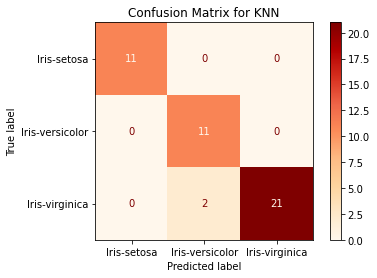

In [52]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for KNN")
plt.show()

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
decision_tree_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Decision Tree is: ', decision_tree_acc)

The accuracy of Decision Tree is:  0.9111111111111111


In [54]:
print(classification_report(test_y, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.73      1.00      0.85        11
 Iris-virginica       1.00      0.83      0.90        23

       accuracy                           0.91        45
      macro avg       0.91      0.94      0.92        45
   weighted avg       0.93      0.91      0.91        45



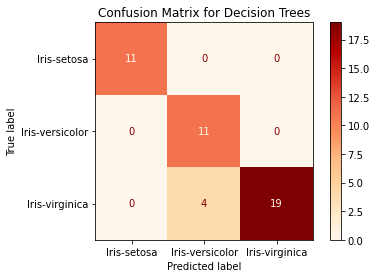

In [55]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Decision Trees")
plt.show()

In [56]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
logistic_reg_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Logistic Regression is: ', logistic_reg_acc)

The accuracy of Logistic Regression is:  0.8888888888888888


In [57]:
print(classification_report(test_y, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.69      1.00      0.81        11
 Iris-virginica       1.00      0.78      0.88        23

       accuracy                           0.89        45
      macro avg       0.90      0.93      0.90        45
   weighted avg       0.92      0.89      0.89        45



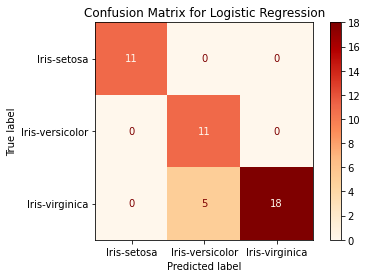

In [58]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [59]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(train_X, train_y)
prediction = model.predict(test_X)
svm_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of SVM is: ', svm_acc)

The accuracy of SVM is:  0.9333333333333333


In [60]:
print(classification_report(test_y, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.87      0.93        23

       accuracy                           0.93        45
      macro avg       0.93      0.96      0.94        45
   weighted avg       0.95      0.93      0.94        45



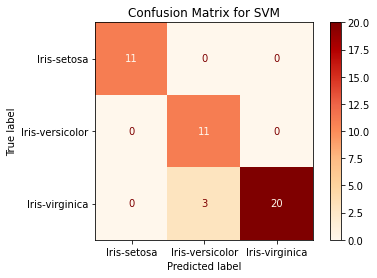

In [61]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for SVM")
plt.show()

In [62]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
naive_bayes_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Gaussian Naive Bayes is: ', naive_bayes_acc)

The accuracy of Gaussian Naive Bayes is:  0.9111111111111111


In [63]:
print(classification_report(test_y, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.73      1.00      0.85        11
 Iris-virginica       1.00      0.83      0.90        23

       accuracy                           0.91        45
      macro avg       0.91      0.94      0.92        45
   weighted avg       0.93      0.91      0.91        45



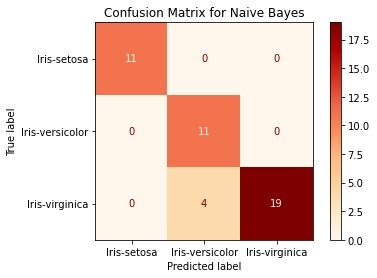

In [64]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

In [65]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
random_forest_acc = metrics.accuracy_score(prediction, test_y)
print('The accuracy of Random Forest is: ', random_forest_acc)

The accuracy of Random Forest is:  0.9111111111111111


In [66]:
print(classification_report(test_y, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.73      1.00      0.85        11
 Iris-virginica       1.00      0.83      0.90        23

       accuracy                           0.91        45
      macro avg       0.91      0.94      0.92        45
   weighted avg       0.93      0.91      0.91        45



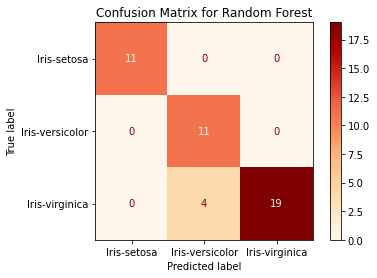

In [67]:
plot_confusion_matrix(model, test_X, test_y,cmap="OrRd")  
plt.title("Confusion Matrix for Random Forest")
plt.show()

Text(0, 0.5, 'Accuracy')

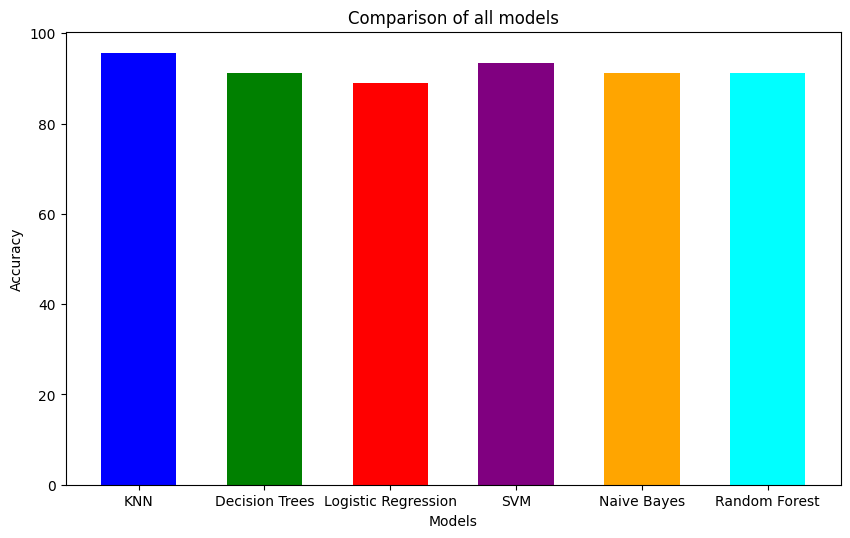

In [68]:
#Comparison of all models
xaxis = ["KNN","Decision Trees","Logistic Regression","SVM","Naive Bayes","Random Forest"]
yaxis = [knn_acc*100, decision_tree_acc*100,logistic_reg_acc*100,svm_acc*100,naive_bayes_acc*100,random_forest_acc*100]
plt.figure(figsize=(10, 6), dpi=100)
plt.bar(xaxis,yaxis,color=['blue','green','red','purple','orange','cyan'],width=0.6)


plt.title("Comparison of all models")
plt.xlabel("Models")
plt.ylabel("Accuracy")